In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iquitos_dataset = pd.read_csv("dengueData/Iquitos/iquitos_training_data.csv")
print(iquitos_dataset.head())
print("Number of observations: ", len(iquitos_dataset))

      season  season_week week_start_date  denv1_cases  denv2_cases  \
0  2000/2001            1      2000-07-01            0            0   
1  2000/2001            2      2000-07-08            0            0   
2  2000/2001            3      2000-07-15            0            0   
3  2000/2001            4      2000-07-22            0            0   
4  2000/2001            5      2000-07-29            0            0   

   denv3_cases  denv4_cases  other_positive_cases  total_cases  
0            0            0                     0            0  
1            0            0                     0            0  
2            0            0                     0            0  
3            0            0                     0            0  
4            0            0                     0            0  
Number of observations:  468


In [3]:
iquitos_cases = iquitos_dataset["total_cases"].values
print(iquitos_cases.shape)

(468,)


In [4]:
def series_to_timeseries_window(data, windowSize):
    x = []
    y = []
    for i in range(len(data)-windowSize):
        x_observation = []
        y_observation = [data[i+windowSize]]
        for j in range(windowSize):
            x_observation.append(data[i+j])
        x.append(x_observation)
        y.append(y_observation)
    return np.array(x), np.array(y)
        

In [5]:
split_index = int(len(iquitos_cases)* 0.7)
print(split_index)
train_X, train_y = series_to_timeseries_window(iquitos_cases[:split_index], 4)
test_X, test_y = series_to_timeseries_window(iquitos_cases[split_index:], 4)

train_X = train_X.reshape(train_X.shape[0], 1, train_X.shape[1])

test_X = test_X.reshape(test_X.shape[0], 1, test_X.shape[1])

327


In [6]:
print(train_X.shape)
print(train_y.shape)

print(test_X.shape)
print(test_y.shape)

(323, 1, 4)
(323, 1)
(137, 1, 4)
(137, 1)


## Create model

Using TensorFlow backend.


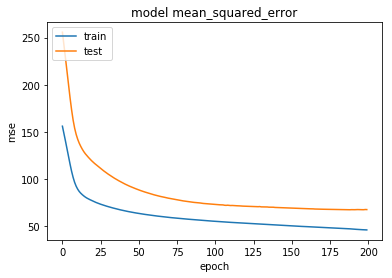

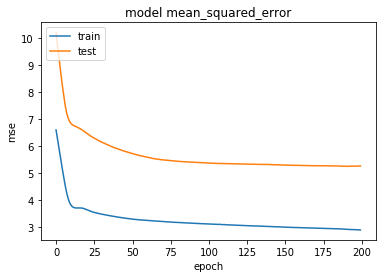

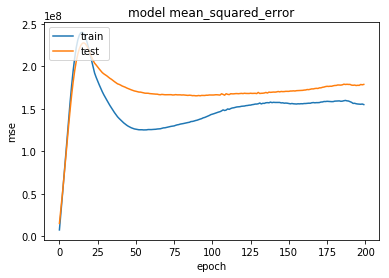

In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU
model = Sequential()
model.add(LSTM(64, input_shape=(1, 4), return_sequences=False))
# model.add(LSTM(16))
# model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="linear"))
model.compile(loss="mse", optimizer="adam", metrics=["mse", "mae", "mape"])

history = model.fit(train_X, train_y, epochs=200, batch_size=32, verbose=0, shuffle=False, validation_data=(test_X, test_y))

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean_squared_error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_squared_error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model mean_squared_error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
# #Test retrain model
# predictions = list()
# for i in range(len(test_y)):
#     prediction = model.predict(test_X[i].reshape(1,1,4))
#     real_value = test_y[i]
    
#     model.fit(test_X[i].reshape(1,1,4), test_y[i], epochs=1, verbose=0)
#     predictions.append(prediction[0])

# plt.plot(predictions, color='red')

# plt.plot(test_y)
# plt.show()

In [2]:
predictions = model.predict(test_X)
plt.plot(predictions, color='red')

plt.plot(test_y)
plt.show()

NameError: name 'model' is not defined

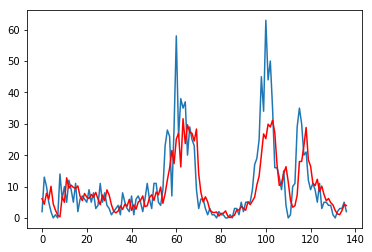

67.2017306924023


In [10]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test_y, predictions)

plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()
print(error)